# Customer Churn Prediction

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('customer_churn.csv')

In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
df.shape

(440833, 12)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Subscription Type'] = le.fit_transform(df['Subscription Type'])
df['Contract Length'] = le.fit_transform(df['Contract Length'])

In [7]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               0
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    0
Contract Length      0
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


In [10]:
df['Churn'] = df['Churn'].astype(int)

In [11]:
df['Churn'].value_counts()

Churn
1    249999
0    190833
Name: count, dtype: int64

## Data Visualization

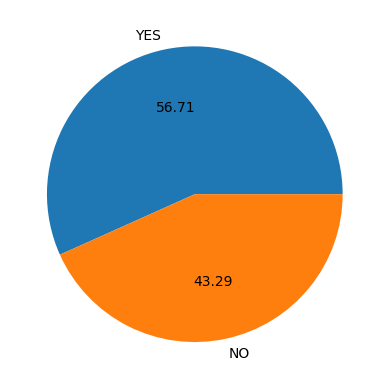

In [26]:
import matplotlib.pyplot as plt
plt.pie(df['Churn'].value_counts(), labels=['YES','NO'], autopct="%0.2f")#autopct shows us percentage
plt.show()

<Axes: >

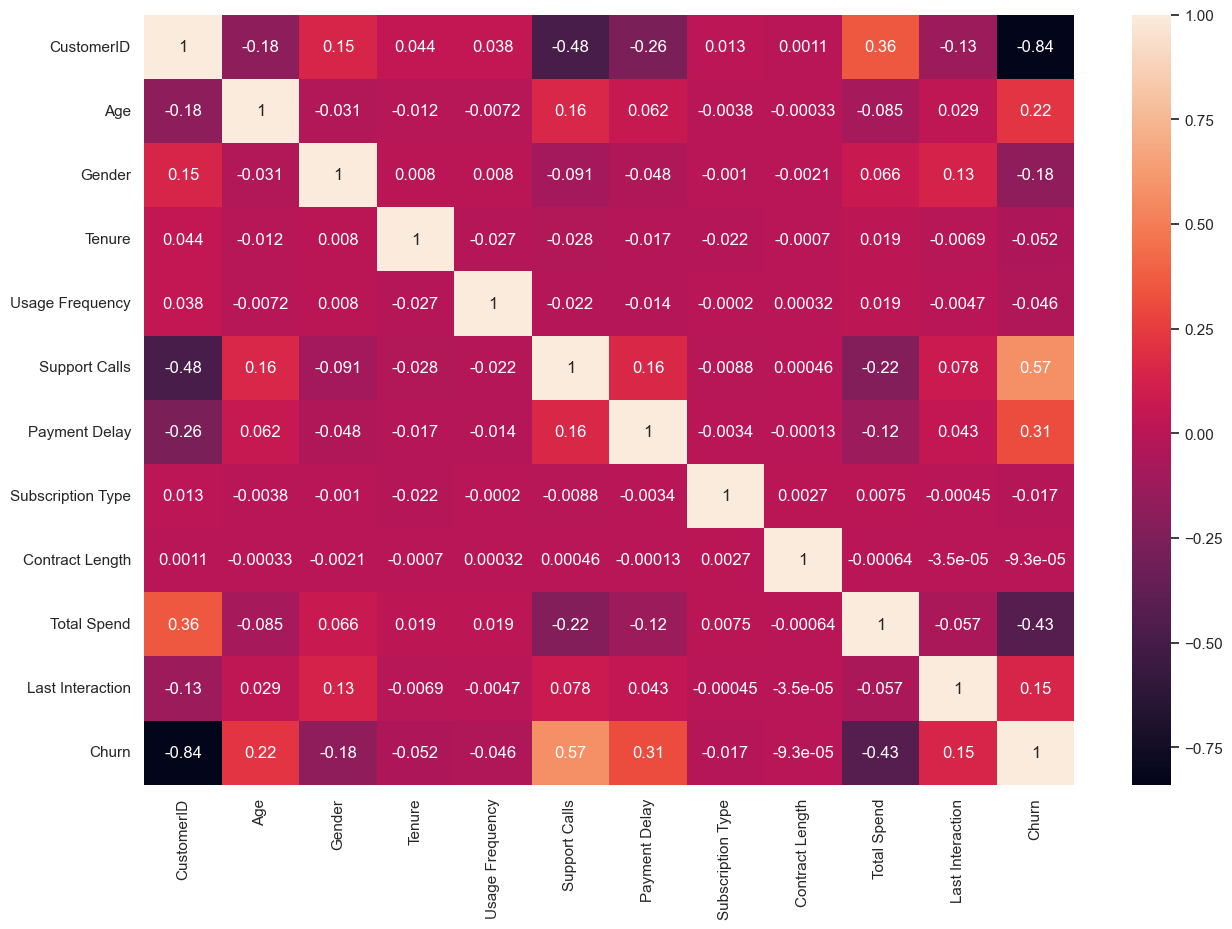

In [27]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(15,10)})
#finding correlation between features using heatmap
sns.heatmap(df.corr(), annot=True)

In [28]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1


<Axes: xlabel='Age', ylabel='Usage Frequency'>

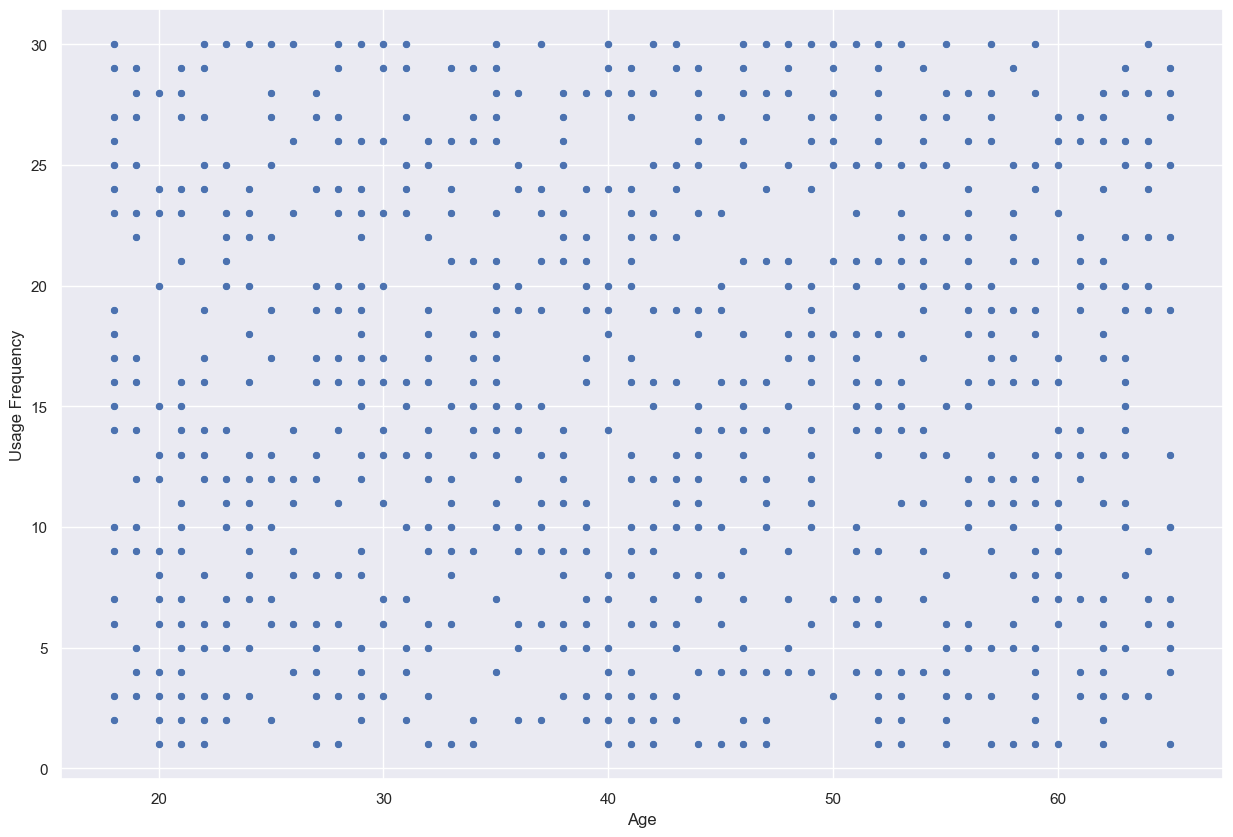

In [32]:
sns.scatterplot(df, x=df['Age'].iloc[:1000], y=df['Usage Frequency'].iloc[:1000])

## Data Splitting

In [12]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled

array([[-7.60532144e-01, -7.54914189e-01,  8.72600402e-01, ...,
         1.11785591e+00,  6.74654128e-01,  6.42421879e-01],
       [-6.71560774e-01, -1.71915246e+00,  8.72600402e-01, ...,
         1.44985744e-03,  1.60088846e-01,  5.26097225e-01],
       [-5.02980598e-01,  5.30736844e-01, -1.14599993e+00, ...,
        -1.11495620e+00, -1.25081596e+00,  1.68934376e+00],
       ...,
       [ 7.24518654e-01, -1.15668014e+00,  8.72600402e-01, ...,
        -1.11495620e+00,  6.97519085e-01,  1.10772049e+00],
       [ 3.78219575e-01, -1.92441862e-01,  8.72600402e-01, ...,
         1.11785591e+00,  1.13593700e+00, -6.37149312e-01],
       [-7.19732052e-01, -1.63879927e+00, -1.14599993e+00, ...,
        -1.11495620e+00, -5.95160196e-01, -1.71850697e-01]])

In [16]:
X_test_scaled

array([[ 1.67155779, -1.07632695,  0.8726004 , ...,  1.11785591,
         0.11232557,  0.40977257],
       [ 1.21829548,  0.77179641,  0.8726004 , ..., -1.1149562 ,
        -0.24197753,  0.17712326],
       [-1.12065509,  0.20932409,  0.8726004 , ..., -1.1149562 ,
         1.44650205,  0.52609722],
       ...,
       [ 0.63492208, -0.674561  ,  0.8726004 , ...,  1.11785591,
        -0.51424066,  0.64242188],
       [ 0.56875894, -0.35314824,  0.8726004 , ..., -1.1149562 ,
        -0.37306718,  0.99139584],
       [-0.72840767, -1.71915246, -1.14599993, ...,  1.11785591,
        -0.71135236,  0.17712326]])

In [17]:
X_train_scaled.shape

(352665, 11)

## Model Training using Neural Networks(4 hidden layers are there)

In [18]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim = 11))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



C:\Users\srija\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,337 (181.00 KB)

 Trainable params: 46,337 (181.00 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history = model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
11021/11021 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9881 - loss: 0.0358
Epoch 2/5
11021/11021 ━━━━━━━━━━━━━━━━━━━━ 10s 897us/step - accuracy: 0.9961 - loss: 0.0098
Epoch 3/5
11021/11021 ━━━━━━━━━━━━━━━━━━━━ 9s 855us/step - accuracy: 0.9970 - loss: 0.0076
Epoch 4/5
11021/11021 ━━━━━━━━━━━━━━━━━━━━ 10s 894us/step - accuracy: 0.9974 - loss: 0.0069
Epoch 5/5
11021/11021 ━━━━━━━━━━━━━━━━━━━━ 10s 895us/step - accuracy: 0.9976 - loss: 0.0060


## Model Evaluation

In [22]:
max_values = {}
for key, value in history.history.items():
    max_values[key] = max(value)

print(max_values)

{'accuracy': 0.9975472688674927, 'loss': 0.020211009308695793}


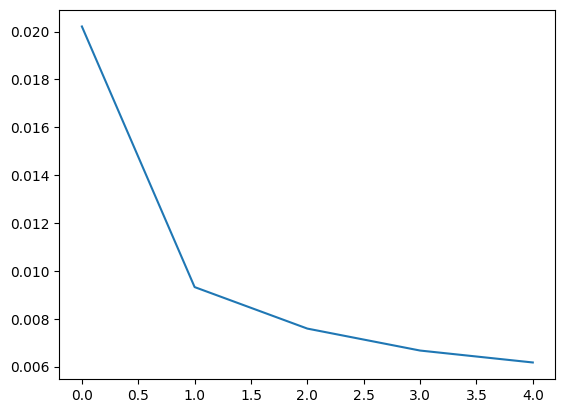

In [23]:
plt.plot(history.history['loss'])

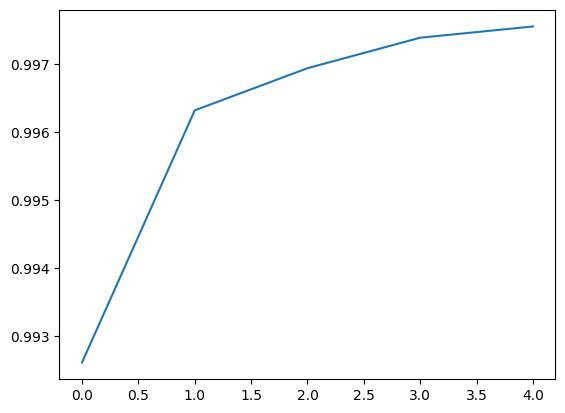

In [24]:
plt.plot(history.history['accuracy'])